# ML training:  using a test/train split and cross-validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Get the data
Here we're manufacturing it.

We're going to generate some fictitious data that follows an equation of our choosing:

$$ y(x) = 4 + 2x - x^2 + 0.075x^3 $$

In [2]:
x = np.linspace(0, 10, 50)
y = 4 + 2*x - x**2 + 0.075*x**3

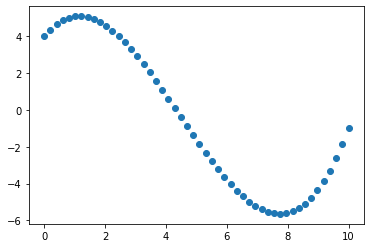

In [3]:
plt.scatter(x,y);

### Real data is noisy

There's always noise in data.  It may be noise from measurement, or "noise" in the sense that there are aspects of the data that aren't captured by the features that we measure.

Let's introduce some random noise into our target values.

In [4]:
# generate 20 points from a normal 
# distribution that has mean = 0 and std dev = 1.5
np.random.seed(42)
noise = np.random.normal(0,1.5,50)

x = np.linspace(0, 10, 50)

# this y is the theoretical value + noise
y_with_noise = 4 + 2*x - x**2 + 0.075*x**3 + noise

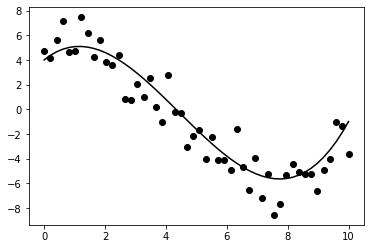

In [5]:
# plot our theory curve
plt.plot(x,y,'k')

# plot our data generated from the theory curve + noise
plt.scatter(x,y_with_noise,color='k',marker='o')

plt.show()

## ML training process

* get the data and pre-process if needed
* choose the model
* train the model
* evaluate the model

In [6]:
# Prepare the data if needed

# Here we need to make the 1D numpy array for x into 
# a 2D numpy array with 1 feature column
x_transformed = x.reshape(-1,1)

In [7]:
# Choose the model

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [8]:
# Train the model

model.fit(x_transformed, y_with_noise)

LinearRegression()

In [12]:
# Evaluate the model

# You need to evaluate your model, so look at
# what it will predict for the outcome variable
y_pred = model.predict(x_transformed)

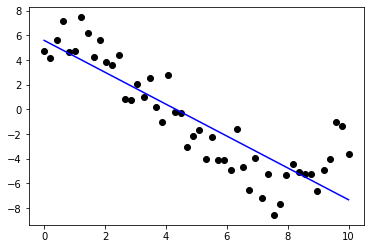

In [11]:
# plot our data generated from the theory curve + noise
plt.scatter(x,y_with_noise,color='black')

# plot the trained model on a range of x-values over all space
x_model_vals = np.linspace(0, 10, 50).reshape(-1,1)
y_model_vals = model.predict(x_model_vals)
plt.plot(x,y_model_vals,'blue')

plt.show()

In [ ]:
# print the model
print('Intercept = %.2f' % model.intercept_)
print('Model coefficients = %.2f' % model.coef_)

In [16]:
# print the MSE of the predictions relative to 
# the true y values of the data
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = %.2f' % mean_squared_error(y_with_noise, y_pred))
print('R^2 = %.2f' % r2_score(y_with_noise, y_pred))

MSE = 4.72
R^2 = 0.75


## Example of instance-based model:  K-Nearest Neighbors

In [ ]:
# Choose the model

import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Train the model

model.fit(x_transformed, y_with_noise)

In [ ]:
# Evaluate the model

# You need to evaluate your model, so look at
# what it will predict for the outcome variable
y_pred = model.predict(x_transformed)

In [ ]:
# plot our data generated from the theory curve + noise
plt.scatter(x,y_with_noise,color='black')

# plot the trained model on a range of x-values over all space
x_model_vals = np.linspace(0, 10, 50).reshape(-1,1)
y_model_vals = model.predict(x_model_vals)
plt.plot(x,y_model_vals,'blue')

plt.show()

In [ ]:
# print the MSE of the predictions relative to 
# the true y values of the data
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = %.2f' % mean_squared_error(y_with_noise, y_pred))
print('R^2 = %.2f' % r2_score(y_with_noise, y_pred))

### Train/test split

If we evaluate our model by quantifying how well it fits the same data that we used to train it, then we risk making a biased judgement about how good it is.  

Our model was explicitly designed to match the data it's trained on.  If we want to know how well it will generalize to making predictions about new data, we should evaluate it on new data.

Solution to this problem -> reserve some of our data (with labels we already know) so that we can use it as "unseen" data when evaluating our model after it's been trained.
* Split into data for training and data for testing
* Below we take our initial data (x, y_with_noise) and we split it up so that 20% of it will not be used in training and can instead be used to evaluate the model at the end
* (x_train, y_train) -> the data used to train the model
* (x_test, y_test) -> the data used to evaluate the model after training
* `random_state` is specified so that we can get a repeatable split of data in case we return to do this multiple times

## Generalize this

The above process is independent of the particular algorithm that we chose to use for our ML.

We are going to do both Linear Regression and k-Nearest Neighbors Regression.

In [14]:
import sklearn.linear_model
import sklearn.neighbors
import sklearn.model_selection

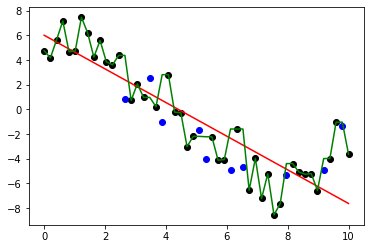

MSE_linreg = 6.43
MSE_knn = 5.60


In [17]:
model1 = sklearn.linear_model.LinearRegression()
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y_with_noise, test_size=0.2, random_state=42)

x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

model1.fit(x_train_transformed,
          y_train)
model2.fit(x_train_transformed,
          y_train)

plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')

x_model_vals = np.linspace(0, 10, 50).reshape(-1,1)
y_model1_vals = model1.predict(x_model_vals)
y_model2_vals = model2.predict(x_model_vals)
plt.plot(x,y_model1_vals,'red')
plt.plot(x,y_model2_vals,'green')

plt.show()

y_pred1 = model1.predict(x_test_transformed)
y_pred2 = model2.predict(x_test_transformed)

print('MSE_linreg = %.2f' % mean_squared_error(y_test, y_pred1))
print('MSE_knn = %.2f' % mean_squared_error(y_test, y_pred2))

## Hyperparameters

Hyperparameters are parameters of the particular ML model that we train, and are different from the parameters of the underlying model that is being trained.
* The slope and intercept of a line are parameters that are learned during the process of linear regression.  
* The number of neighbors that get used during kNN is a hyperparameter that gets specified before the training is performed and it is not a parameter whose value is learned from the data.

The ML model can have different levels of performance for different values of hyperparameters.

Let's see which value of nearest neighbors gives the best performance here.

In [ ]:
def knntest(n=1):
    model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y_with_noise, test_size=0.2, random_state=42)

    x_train_transformed = x_train.reshape(-1,1)
    x_test_transformed = x_test.reshape(-1,1)

    model2.fit(x_train_transformed,
              y_train)

    y_pred2 = model2.predict(x_test_transformed)

    print('n_neighbers = {:02d} : MSE_knn = {:.2f}'.format(n, mean_squared_error(y_test, y_pred2)))

In [ ]:
for i in range(1,15):
    knntest(i)

We can use the above to select a value of the hyperparameter that works the best.

In [ ]:
def knntest(n=1):
    model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y_with_noise, test_size=0.2, random_state=42)

    x_train_transformed = x_train.reshape(-1,1)
    x_test_transformed = x_test.reshape(-1,1)

    model2.fit(x_train_transformed,
              y_train)

    y_predtrain = model2.predict(x_train_transformed)
    y_predtest = model2.predict(x_test_transformed)

    return(n,
           mean_squared_error(y_train, y_predtrain),
           mean_squared_error(y_test, y_predtest))
    
kscores_nneighbors = []
kscores_train = []
kscores_test = []
for i in range(1,15):
    result = knntest(i)
    kscores_nneighbors.append(result[0])
    kscores_train.append(result[1])
    kscores_test.append(result[2])

In [ ]:
plt.plot([1/i for i in kscores_nneighbors], kscores_train, 
         [1/i for i in kscores_nneighbors], kscores_test,
         marker='o',markersize=4)
plt.xlabel('Flexibility (here 1/n_neighbors)')
plt.legend(['train error','test error'])

## Potential problems

If we evaluate our model on data that has been used to train the model, then we run the risk of fitting our model too closely to the specifics of the data.

Likewise, if we determine the ideal values of our hyperparameters based on how they perform on the test data, we run the risk of fitting our hyperparameters too closely to the specifics of our test data.

Solution to this problem -> cross-validation:
* split the training data up into K folds, where K is an arbitrarily chosen number
* train the model K times, each time holding out a different subset to use for testing and training on the remaining K-1 subsets
* average the K resulting scores
* repeat as needed for various values of hyperparameters
* chose the hyperparameter with the best results in the cross-validation process, and assess it in the final stage by training on the full training data and testing against the test data

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y_with_noise, test_size=0.2, random_state=42)
x_train_transformed = x_train.reshape(-1,1)

loss = cross_val_score(model2,
                       x_train_transformed,
                       y_train, 
                       cv=5, 
                       scoring='neg_mean_squared_error')
loss

In [ ]:
np.mean(np.sqrt(-loss))

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y_with_noise, test_size=0.2, random_state=42)
x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train_transformed,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    k_scores.append(np.sqrt(-loss).mean())
plt.scatter(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

Now we have our best guess for a hyperparameter

In [ ]:
knntest(n=4)

In [ ]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=4)

model.fit(x_train_transformed, y_train)

plt.plot(x,y,'k')
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')

x_model_vals = np.linspace(0, 10, 50).reshape(-1,1)
y_model_vals = model.predict(x_model_vals)
plt.plot(x,y_model_vals,'green')

plt.show()

y_pred = model.predict(x_test_transformed)

print('MSE_knn = ', mean_squared_error(y_test, y_pred))